In [1]:
# import packages
using LinearAlgebra, HDF5, FileIO, Statistics, Interpolations, ImageFiltering
using DataFrames
push!(LOAD_PATH,"../")
using HF0d

#set up plotting
using ColorSchemes
cmap = colorschemes[:balance]
using PyPlot
rgbtotuple(c) = (c.r,c.g,c.b)
pal = rgbtotuple.(colorschemes[:Set1_9])
function remove_extra_borders!(contourlines)
    for c in contourlines.collections
        c.set_edgecolor("face")
    end
end

remove_extra_borders! (generic function with 1 method)

In [20]:
# U0, U1 = 30, 15
# δ=0.075
# Nf1,Nf2,Nf = 8,8,16
# hfm = HFmodel_supermoire(1000; δ);

N=1000 #large number of points to resolve the peak, but doesn't affect HF much
hfm = HF0d.HFmodel_supermoire(N; Umm=30,Umsm=15,Usmsm=0,W1=20,W2=5,δ=0.075);

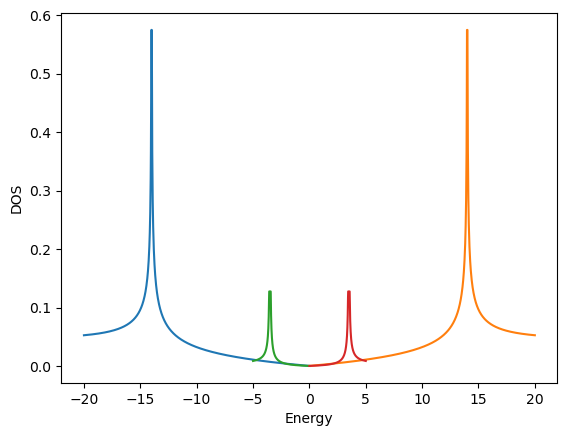

PyObject Text(24.000000000000007, 0.5, 'DOS')

In [21]:
plot(hfm.ϵs[1],hfm.ρs[1],label="Hole band")
plot(hfm.ϵs[5],hfm.ρs[5],label="Electron band")
plot(hfm.ϵs[9],hfm.ρs[9],label="Hole Supermoir\'e band")
plot(hfm.ϵs[13],hfm.ρs[13],label="Electron Supermoir\'e band")
xlabel("Energy")
ylabel("DOS")

# Run Optimization --- takes a few minutes

In [22]:
#list of chemical potentials
μs = 0:0.5:200

#run HF --- takes a few minutes
repeats = 5 #to get global minimum
@time νsopt, Φsopt = run_HF(μs,hfm,repeats);

μ = 4.5 (10/401)
μ = 9.5 (20/401)
μ = 14.5 (30/401)
μ = 19.5 (40/401)
μ = 24.5 (50/401)
μ = 29.5 (60/401)
μ = 34.5 (70/401)
μ = 39.5 (80/401)
μ = 44.5 (90/401)
μ = 49.5 (100/401)
μ = 54.5 (110/401)
μ = 59.5 (120/401)
μ = 64.5 (130/401)
μ = 69.5 (140/401)
μ = 74.5 (150/401)
μ = 79.5 (160/401)
μ = 84.5 (170/401)
μ = 89.5 (180/401)
μ = 94.5 (190/401)
μ = 99.5 (200/401)
μ = 104.5 (210/401)
μ = 109.5 (220/401)
μ = 114.5 (230/401)
μ = 119.5 (240/401)
μ = 124.5 (250/401)
μ = 129.5 (260/401)
μ = 134.5 (270/401)
μ = 139.5 (280/401)
μ = 144.5 (290/401)
μ = 149.5 (300/401)
μ = 154.5 (310/401)
μ = 159.5 (320/401)
μ = 164.5 (330/401)
μ = 169.5 (340/401)
μ = 174.5 (350/401)
μ = 179.5 (360/401)
μ = 184.5 (370/401)
μ = 189.5 (380/401)
μ = 194.5 (390/401)
μ = 199.5 (400/401)
 97.594708 seconds (367.27 M allocations: 37.186 GiB, 0.91% gc time, 0.20% compilation time)


In [17]:
#rearrange and sort data 
νsopt2 = stack(νsopt)
νsopt2[1:Nf1,:] .= sort(νsopt2[1:Nf1,:],dims=1)
νsopt2[Nf1+1:Nf,:] .= sort(νsopt2[Nf1+1:Nf,:],dims=1)

#compute numerical derivative dmu/dn
νstot, κs = compressibility(μs, νsopt2; smooth=2, cutoff=1/50)
νstot .-= 4; #make range nu = [0,4]

μs2 = μs .- μs[1] #set μ(ν=0) = 0

0:200

# Plot Everything

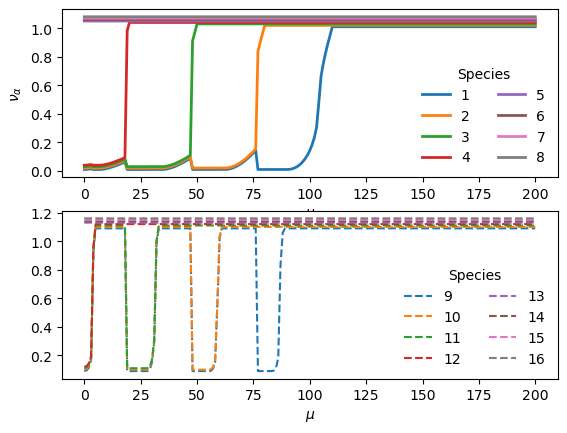

PyObject <matplotlib.legend.Legend object at 0x2ad56a580>

In [18]:
#moire fillings
fig, axs = subplots(2,1)
for α in 1:Nf1
    offset = 0.01*α
    axs[1].plot(μs,offset .+ νsopt2[α,:] * (1/(1-δ)),lw=2,label=α)
end
axs[1].set_xlabel(L"$\mu$")
axs[1].set_ylabel(L"$\nu_{\alpha}$")
axs[1].legend(ncol=2,title="Species",frameon=false)

#supermoire fillings
for (n,α) in enumerate(Nf1+1:Nf)
    offset = 0.01*α
    axs[2].plot(μs,offset .+ νsopt2[α,:]*(1/(δ)),ls="--",label=α)
end
axs[2].set_xlabel(L"$\mu$")
axs[1].set_ylabel(L"$\nu_{\alpha}$")
axs[2].legend(ncol=2,title="Species",frameon=false)


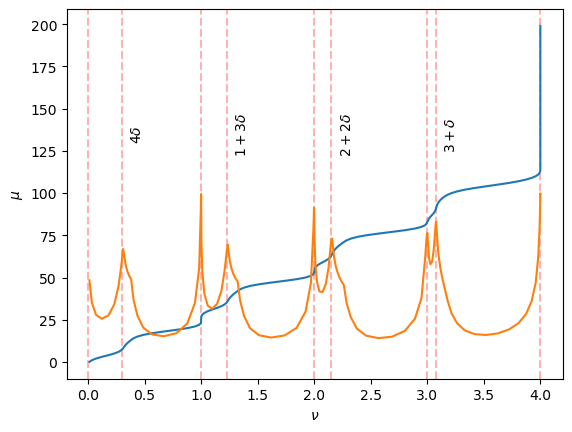

PyObject Text(25.000000000000007, 0.5, '$\\mu$')

In [19]:
plot(νstot, μs2[1:end-1])
plot(νstot, 1 ./ κs)

for x in [0,1,2,3,4, 0+4*δ, 1+3*δ,2+2*δ,3+δ]
    axvline(x,color=(1,0,0,0.3),ls="--",zorder=-1)
end

ycoord = 125
text(0+5*δ,ycoord+10,L"$4\delta$",rotation=90,va="center")
text(1+4*δ,ycoord+10,L"$1+3\delta$",rotation=90,va="center")
text(2+3*δ,ycoord+10,L"$2+2\delta$",rotation=90,va="center")
text(3+2*δ,ycoord+10,L"$3+\delta$",rotation=90,va="center")

xlabel(L"$\nu$")
ylabel(L"$\mu$")

# ylim(0,150)
# xlim(0,4)

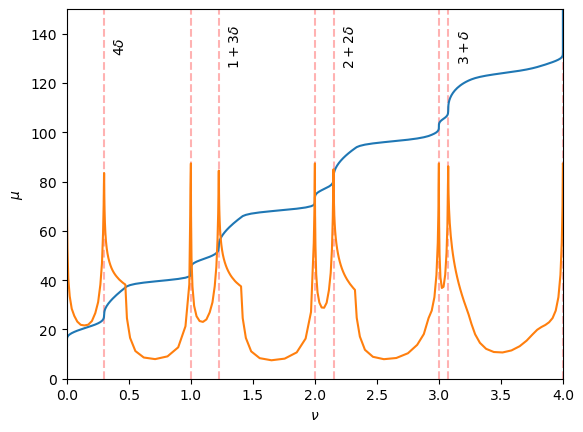

(0.0, 4.0)

In [7]:
plot(νstot, μs2[1:end-1])
plot(νstot, 1 ./ κs)

for x in [0,1,2,3,4, 0+4*δ, 1+3*δ,2+2*δ,3+δ]
    axvline(x,color=(1,0,0,0.3),ls="--",zorder=-1)
end

ycoord = 125
text(0+5*δ,ycoord+10,L"$4\delta$",rotation=90,va="center")
text(1+4*δ,ycoord+10,L"$1+3\delta$",rotation=90,va="center")
text(2+3*δ,ycoord+10,L"$2+2\delta$",rotation=90,va="center")
text(3+2*δ,ycoord+10,L"$3+\delta$",rotation=90,va="center")

xlabel(L"$\nu$")
ylabel(L"$\mu$")

ylim(0,150)
xlim(0,4)